# [선형 회귀(Linear Regression)](https://)
- 널리 사용되는 대표적인 회귀 알고리즘으로 [선형 회귀는 종속 변수 y와
하나 이상의 독립 변수 x와의 선형 상관관계를 모델링](https://)하는 기법
- [단순 선형 회귀(Simple Linear Regression)](https://)
>- 독립 변수[ x가 1개이며 y=Wx+b의 식으로 나타냄](https://)
>- 머신러닝에서는 독립 변수 x에 곱해지는 W값을 가중치(weight), 상수항에 해당하는 b를 편향(bias)이라고 부름 [링크 텍스트](https://)
>- 단순 선형 회귀 모델을 훈련하는 것은[ 적절한 W와 b값을 찾는 것임](https://)
>- 그래프의 형태는[ 직선으로 ](https://)나타냄
- [다중 선형 회귀(Multiple Linear Regression)](https://)
>- 독립 변수[ x가 2개 이상으로 y=W1x1+W2x2+...+Wnxn+b의 ](https://)식으로 나타냄
>- [여러 독립 변수에](https://) 의해 영향을 받는 경우임
>- 만약 2개의 독립 변수면 그래프는 [평면으로](https://) 나타날 것임




---



# [모델 파라미터(Parameter)](https://)
- 모델의 구성 요소이자 [데이터로부터 학습되는 것
](https://)

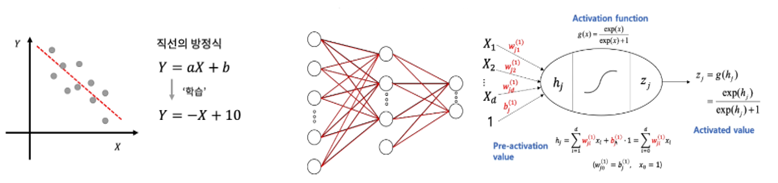



---



# [머신러닝 모델의 하이퍼파라미터(Parameter)](https://)
- 모델 학습 과정에 반영되며, [학습을 시작하기 전에 미리 값을 결정하는 것](https://)
- 좋은 모델을 만들기 위해서는[ 하이퍼파라미터를 잘 튜닝/컨트롤 해야 함](https://)
- 학습 알고리즘, 모델의 구조 등 총체적인 이해가 필요함
>- 예) 여러 오븐에 각각 다른 세팅을 주어 빵을 구우면?
>>- 반죽을 오븐에 넣어서 모델을 만들어내기 전에 온도, 시간을 세팅을 한다 → [온도, 시간 : 하이퍼파라미터](https://)




---



# [k-최근접 이웃의 한계](https://)



---



## [데이터와 모델 준비하기 ](https://)

In [1]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,  21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,  22.5, 22.7, 23.0,
     23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0,
     39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
     150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
     556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])



---



## [데이터를 훈련 세트와 테스트 세트로 나눔(특성 데이터는 2차원 배열로 변환)](https://)


In [2]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)



---



## [모델 훈련하기(k=3) - KNeighborsRegressor](https://)


In [3]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)



---



## [길이가 50cm인 농어의 무게를 예측하기](https://)


In [4]:
print(knr.predict([[50]])) #1,033g 정도로 예측(실제 이 농어의 무게는 훨씬 더 많이 나감)

[1033.33333333]




---



## [산점도 그리기 - 훈련 세트와 50cm 농어](https://)


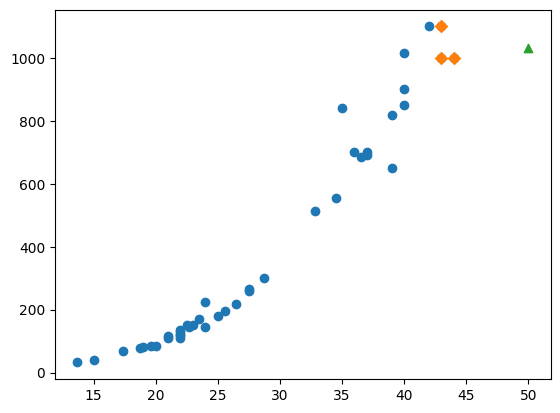

In [20]:
from matplotlib import pyplot as plt

#50cm 농어의 이웃을 구함
#kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있음
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그림
#plt.figure(figsize=(10,8))
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel=('length')
plt.ylabel=('weight')
plt.show()

In [7]:
#50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에
#k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균을 구함(모델이 예측했던 값과 정확히 일치)

print(np.mean(train_target[indexes]))

1033.3333333333333




---



## [산점도 그리기 - 훈련 세트와 100cm 농어](https://)


In [22]:
print(knr.predict([[100]])) #새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음
#농어의 길이가 커지더라도 무게가 늘지 않음 ⇒ 새로운 훈련데이터를 새로 만들어야 함

[1033.33333333]


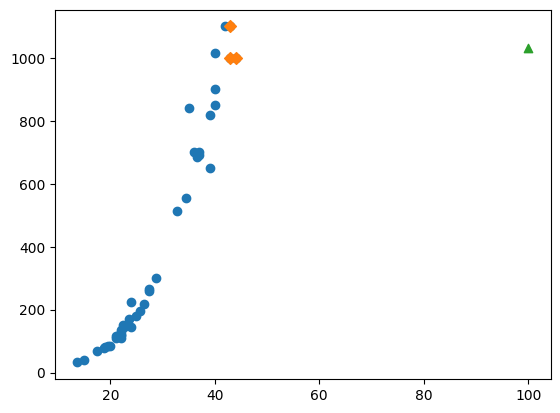

In [21]:
#100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel=('length')
plt.ylabel=('weight')
plt.show()



---



# [LinearRegression 클래스로 모델 만들기](https://)

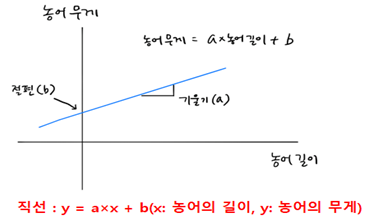

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측 -> 50cm 농어의 무게를 아주 높게 예측
print(lr.predict([[50]]))

[1241.83860323]


In [24]:
#계수는 coef_, 절편은 intercept_ 속성에 저장
#기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 함
print("기울기 = ", lr.coef_)
print("절편(편향) = ", lr.intercept_)

기울기 =  [39.01714496]
절편(편향) =  -709.0186449535477




---



## [산점도 그리기](https://)

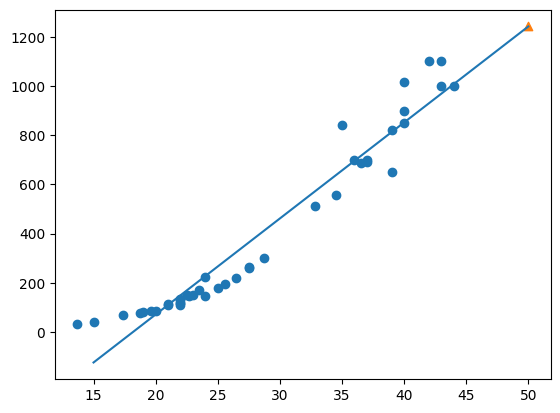

In [25]:
#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그림
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel=('length')
plt.ylabel=('weight')
plt.show()

In [26]:
print(lr.score(train_input, train_target)) #훈련 세트 R2
print(lr.score(test_input, test_target))   #테스트 세트 R2

0.939846333997604
0.8247503123313558


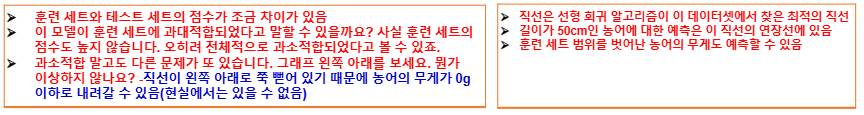



---



## [최적의 곡선 찾기](https://)
- 농어의 길이와 무게에 대한 산점도를 자세히 보면 일직선이라기보다 왼쪽 위로 [조금 구부러진 곡선에 가까움](https://)


In [27]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


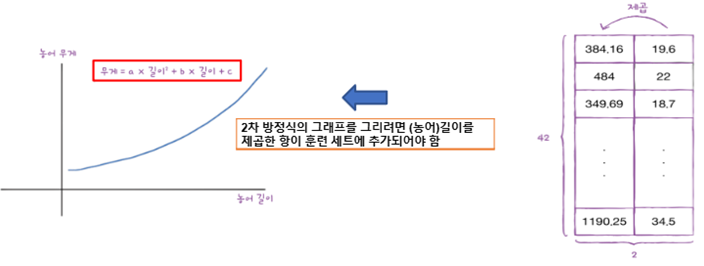



---



## [train_poly를 사용해 선형 회귀 모델을 훈련하기](https://)


In [29]:
ir = LinearRegression()
lr.fit(train_poly, train_target)

#테스트할 때는 모델에 농어 길이의 제곱과 원래 길이를 함께 넣어 주어야 함
print(lr.predict([[50**2, 50]])) #앞서 훈련한 모델보다 더 높은 값을 예측 - [1241.83860323]

[1573.98423528]


In [30]:
#무게 = a*길이2 + b*길이1 +c
#무게 = 1.01× 길이2 - 21.6× 길이1 + 116.05
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


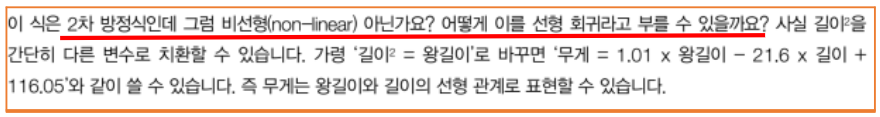



---



## [동일한 훈련 세트의 산점도 그리기](https://)

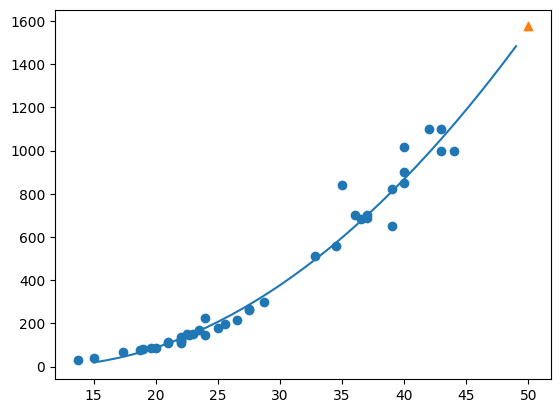

In [31]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듬
point = np.arange(15, 50)

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()



---



## [훈련 세트와 테스트 세트의 R2 점수를 평가하기](https://)


In [33]:
print(lr.score(train_poly, train_target)) #0.9398463339976039
print(lr.score(test_poly, test_target)) #0.8247503123313558

0.9706807451768623
0.9775935108325122
